# Neuromodulation dopamine and acetylcholine - acetylcholine  - adaptive - spiking presynaptic neuron

To simulate single neuromodulator in Snudda, firstly, the parameters from Neuromodcell have to been saved in modulations.json and placed in the model dircetory. 


To install snudda, follow the instructions at https://github.com/Hjorthmedh/Snudda/wiki/1.-User-installation

Following installation, the code below will set up the network and the neuromodulatory modulation.

To set the $DATA parameter for snudda, 

In [1]:
import os
os.environ["SNUDDA_DATA"] = "data"

This should be set to the directory where neurons, synapses and other parameters for the network have been placed. Look at the 'data' directory for referenece

Set the directory for where the neurons for the striatum (in this example) are saved

In [ ]:
neurons_dir = os.path.abspath(os.path.join("data","neurons"))

We wrote a specific neuromodulation init (based on snuddas init.py), to load the synapses which have had the modulation parameters included into the parameter sets as well as add SNc and dopaminergic neurons to the simulation

In [ ]:
from code.neuromodulationInitSNc import neuromodulationInit

network_path = "dopamine-acetylcholine-adaptive-trial-network"
config_name= os.path.join(network_path,"network-config.json")
cnc = neuromodulationInit(config_file=config_name,random_seed=12345)

cnc.define_striatum_neuromodulation(num_dSPN=5, num_iSPN=5, num_ChIN=1, volume_type="cube",neurons_dir=neurons_dir)
cnc.define_snc(nNeurons=4,neuron_dir=neurons_dir)
dirName = os.path.dirname(config_name)

if not os.path.exists(dirName):
    os.makedirs(dirName)
    
cnc.write_json(config_name)

Then we place the neurons within the network (as we are running this locally we are limiting the network to 21 neurons). We then detect the potential synapses (by appositions between axons and dendrites) and then remove (prune) to reproduce the reported connectivity.  

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()

Following the assembly of the circuit, we set up the neuromodulatory connections which are needed for adaptive neuromodulation. The user defines the connections which are needed and the name of the connector, here we chose concACh and concDA. For the control, we set the weight as 0, otherwise 1e-2

In [ ]:
# Set up neuromodulation per synapse

from snudda.neuromodulation.modulation_synapse import  NeuromodulationSynapse

sw = NeuromodulationSynapse()
sw.set_weight(weight=1e-2)

# Acetylcholine

sw.set_connection_type(connector="concACh", neuromodulation_key="ACh")

sw.add_cell_modulation(neuromodulation_key="ACh",
               cell="dSPN",
               ion_channels={
                   "soma": ["kir_ms", "cal12_ms", "cal13_ms", "can_ms", "Im_ms"],
                   "dendrite": ["kir_ms", "cal12_ms", "cal13_ms"]},
               type_connection="spiking-concentration")

sw.add_cell_modulation(neuromodulation_key="ACh",
               cell="iSPN",
               ion_channels={
                   "soma": ["kir_ms", "cal12_ms", "cal13_ms", "can_ms"],
                   "dendrite": ["kir_ms", "cal12_ms", "cal13_ms"]},
               type_connection="spiking-concentration")

# Dopamine

sw.set_connection_type(connector="concDA", neuromodulation_key="DA")

sw.add_cell_modulation(neuromodulation_key="DA",
               cell="dSPN",
               ion_channels={
                   "soma": ["kas_ms", "kaf_ms", "can_ms"],
                   "dendrite": ["kaf_ms", "kas_ms"],
                   "axon": []},
               receptors={"tmGabaA": {"maxMod": 0.8},
                          "tmGlut": {"maxMod_AMPA": 1.2,
                                     "maxMod_NMDA": 1.3,
                                     "failRate": 0.7}},
               extrinsic=["CorticalBase", "CorticalSignal", "Thalamic"],
               type_connection="spiking-concentration")

sw.add_cell_modulation(neuromodulation_key="DA",
               cell="iSPN",
               ion_channels={
                   "soma": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms", "can_ms",
                            "car_ms"],
                   "dendrite": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms",
                                "can_ms", "car_ms"],
                   "axon": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms", "can_ms",
                            "car_ms"]},
               receptors={"tmGabaA": {"maxMod": 0.99},
                          "tmGlut": {"maxMod_AMPA": 0.8,
                                     "maxMod_NMDA": 0.8,
                                     "failRate": 1.3}},
               extrinsic=["CorticalBase", "CorticalSignal", "Thalamic"],
               type_connection="spiking-concentration")

sw.save(dir_path=os.path.join("data","modulation"), name="DA-ACh.json")


In [ ]:
# Set up neuromodulation per synapse

from snudda.neuromodulation.modulation_synapse import  NeuromodulationSynapse

sw = NeuromodulationSynapse()
sw.set_weight(weight=0)

# Acetylcholine

sw.set_connection_type(connector="concACh", neuromodulation_key="ACh")

sw.add_cell_modulation(neuromodulation_key="ACh",
               cell="dSPN",
               ion_channels={
                   "soma": ["kir_ms", "cal12_ms", "cal13_ms", "can_ms", "Im_ms"],
                   "dendrite": ["kir_ms", "cal12_ms", "cal13_ms"]},
               type_connection="spiking-concentration")

sw.add_cell_modulation(neuromodulation_key="ACh",
               cell="iSPN",
               ion_channels={
                   "soma": ["kir_ms", "cal12_ms", "cal13_ms", "can_ms"],
                   "dendrite": ["kir_ms", "cal12_ms", "cal13_ms"]},
               type_connection="spiking-concentration")

# Dopamine

sw.set_connection_type(connector="concDA", neuromodulation_key="DA")

sw.add_cell_modulation(neuromodulation_key="DA",
               cell="dSPN",
               ion_channels={
                   "soma": ["kas_ms", "kaf_ms", "can_ms"],
                   "dendrite": ["kaf_ms", "kas_ms"],
                   "axon": []},
               receptors={"tmGabaA": {"maxMod": 0.8},
                          "tmGlut": {"maxMod_AMPA": 1.2,
                                     "maxMod_NMDA": 1.3,
                                     "failRate": 0.7}},
               extrinsic=["CorticalBase", "CorticalSignal", "Thalamic"],
               type_connection="spiking-concentration")

sw.add_cell_modulation(neuromodulation_key="DA",
               cell="iSPN",
               ion_channels={
                   "soma": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms", "can_ms",
                            "car_ms"],
                   "dendrite": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms",
                                "can_ms", "car_ms"],
                   "axon": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms", "can_ms",
                            "car_ms"]},
               receptors={"tmGabaA": {"maxMod": 0.99},
                          "tmGlut": {"maxMod_AMPA": 0.8,
                                     "maxMod_NMDA": 0.8,
                                     "failRate": 1.3}},
               extrinsic=["CorticalBase", "CorticalSignal", "Thalamic"],
               type_connection="spiking-concentration")

sw.save(dir_path=os.path.join("data","modulation"), name="DA-ACh-control.json")


Compile the mechanisms used in the simulation

In [ ]:
!rm -r x86_64/
!nrnivmodl mechanisms-modulation-ptr/

Restart the kernel (if the assembly and generation of input and simulation are in different notebooks - THIS STEP IS NOT NEEDED)

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()


In [ ]:
from snudda.input import SnuddaInput
import os

os.environ["SNUDDA_DATA"] = "data"

network_path = "dopamine-acetylcholine-adaptive-trial-network"

si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("data","external_input","external-input-trial.json"),
                 verbose=False)
si.generate()

We then simulate the dopamine-acetylcholine and control case using Snudda

In [ ]:
import os

os.environ["SNUDDA_DATA"] = "data"

In [ ]:
!snudda simulate dopamine-acetylcholine-adaptive-trial-network --time 3.0 --outputFile "dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.hdf5" --neuromodulation "data/modulation/DA-ACh.json" --verbose

In [ ]:
!snudda simulate dopamine-acetylcholine-adaptive-trial-network --time 3.0 --outputFile 'dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial-control.hdf5' --neuromodulation "data/modulation/DA-ACh-control.json"

Following the simulation, we plot the simulations individually using code from snudda. First, the dopamine-acetylcholine modulated simulation

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = "dopamine-acetylcholine-adaptive-trial-network"
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-ACh-trial.hdf5")

pl = PlotTraces(output_file=volt_file_name,network_file=network_file)

pl.plot_trace_neuron_type(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="ChIN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)

Second, we plot the control simulation. 

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = "dopamine-acetylcholine-adaptive-trial-network"
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-ACh-trial-control.hdf5")

pl = PlotTraces(output_file=volt_file_name,network_file=network_file)

pl.plot_trace_neuron_type(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="ChIN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="DopaminergicAxon", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


We need load and plot control (black) and dopamine/acetylcholine modulated (red). We see clear effect on dSPN, which should depolarise upon dopamine modulation and the tonic depolarisation following muscarinic modulation, while iSPN do not have a clear effect from dopamine, but muscarinic modulation is tonic and depolarises the cell. FS have quite a large response to dopamine modulation, which is also seen in the network

In [ ]:
os.makedirs(os.path.join("dopamine-acetylcholine-adaptive-trial-network","analysis"), exist_ok=True)

In [2]:
from code.plot import plot_dopamine_acetylcholine_control
from code.compare import compareTraces

network_path = "dopamine-acetylcholine-adaptive-trial-network"

fn = [os.path.join(network_path, "simulation","network-voltage-DA-ACh-trial-control.hdf5"),
     os.path.join(network_path ,"simulation", "network-voltage-DA-ACh-trial.hdf5")]

nf = [os.path.join(network_path, "network-synapses.hdf5"),
     os.path.join(network_path, "network-synapses.hdf5")]


kl = compareTraces(fileNames=fn,
                   networkFiles=nf,labels=["control", "DA-ACh"],colours=["black","red"])

Loading dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial-control.hdf5
Loading dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.hdf5


In [3]:
os.makedirs(os.path.join(network_path, "analysis"), exist_ok=True)

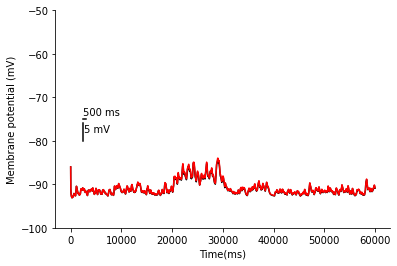

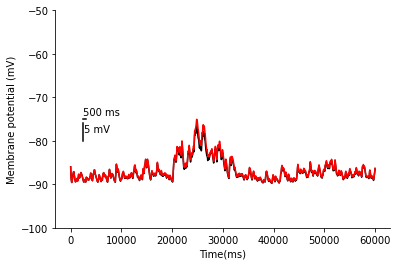

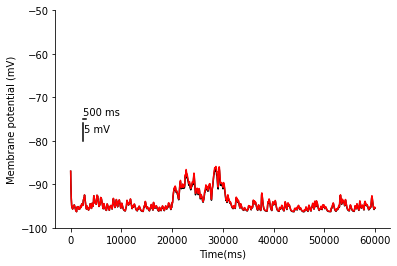

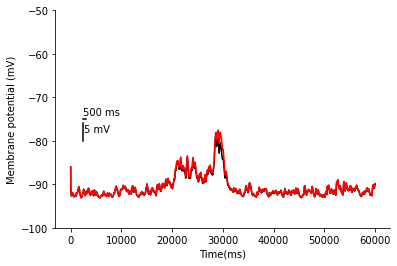

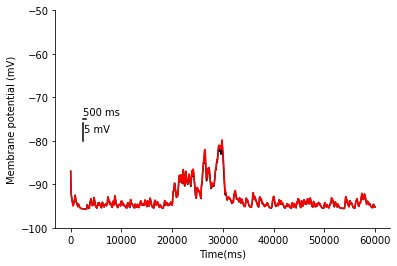

In [4]:
plot_dopamine_acetylcholine_control(kl,type_cell='dSPN', network_path=network_path)


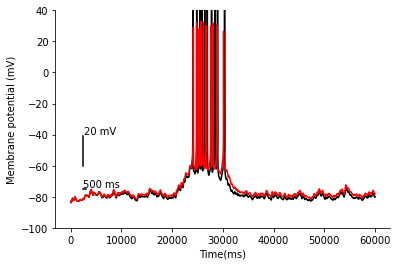

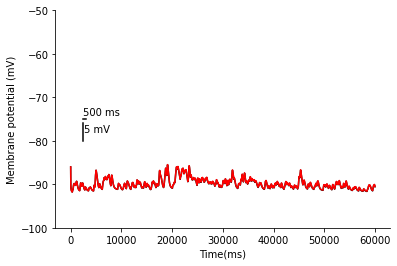

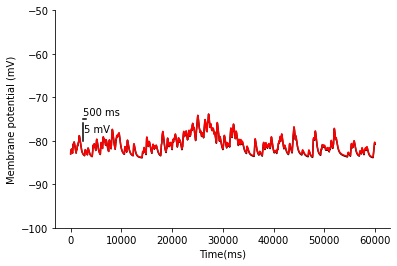

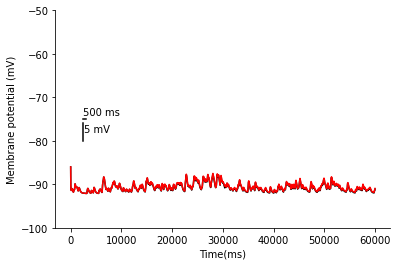

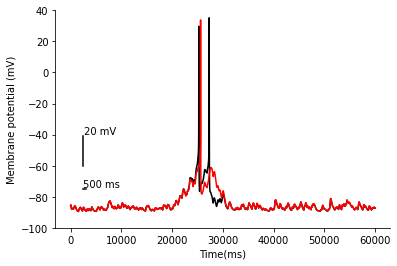

In [5]:
plot_dopamine_acetylcholine_control(kl,type_cell='iSPN', network_path=network_path)